In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('credit_card_data.csv')
df.head(5)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
# Basic info and statistics
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
# Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Show missing values before cleaning
print("Missing values before cleaning:\n", df.isna().sum())

# Handle missing values
if 'MINIMUM_PAYMENTS' in df.columns:
    median_payment = df['MINIMUM_PAYMENTS'].median()
    df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(median_payment)

if 'CREDIT_LIMIT' in df.columns:
    df = df.dropna(subset=['CREDIT_LIMIT'])

# Show missing values after cleaning
print("\nMissing values after cleaning:\n", df.isna().sum())


Missing values before cleaning:
 BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Missing values after cleaning:
 BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PU

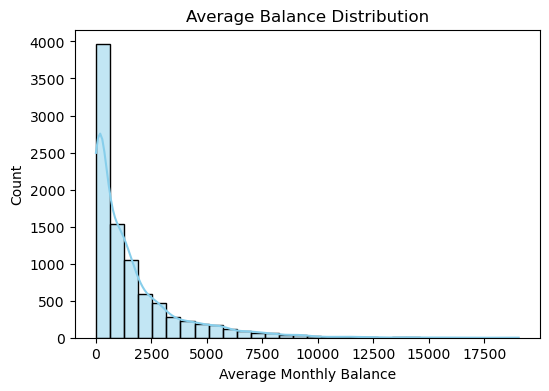

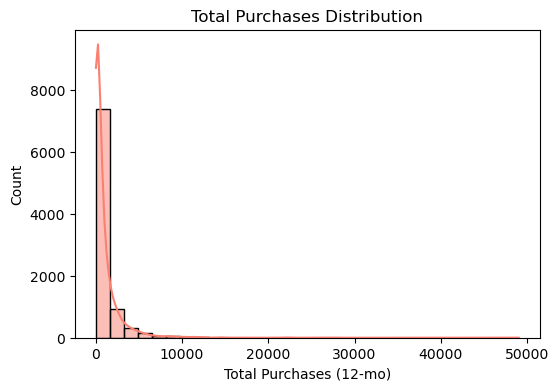

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['BALANCE'], bins=30, kde=True, color='skyblue')
plt.title('Average Balance Distribution')
plt.xlabel('Average Monthly Balance')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['PURCHASES'], bins=30, kde=True, color='salmon')
plt.title('Total Purchases Distribution')
plt.xlabel('Total Purchases (12-mo)')
plt.show()


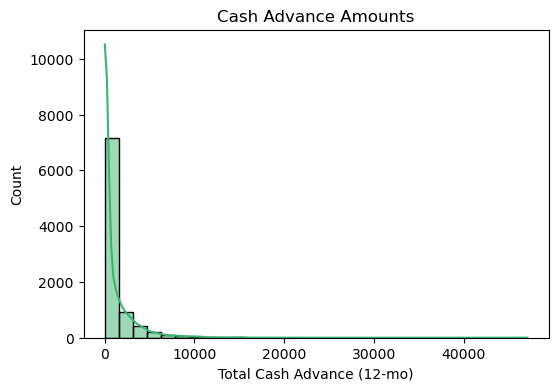

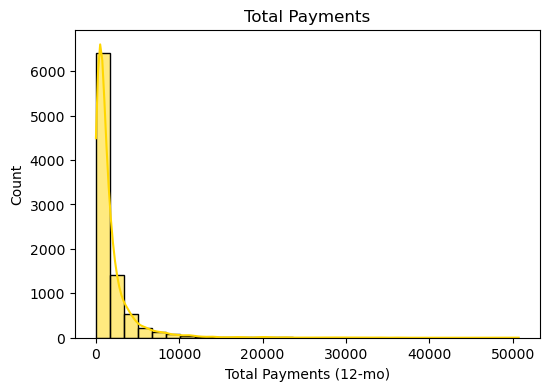

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['CASH_ADVANCE'], bins=30, kde=True, color='mediumseagreen')
plt.title('Cash Advance Amounts')
plt.xlabel('Total Cash Advance (12-mo)')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['PAYMENTS'], bins=30, kde=True, color='gold')
plt.title('Total Payments')
plt.xlabel('Total Payments (12-mo)')
plt.show()


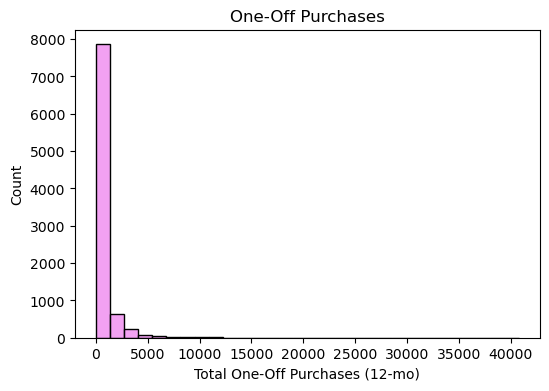

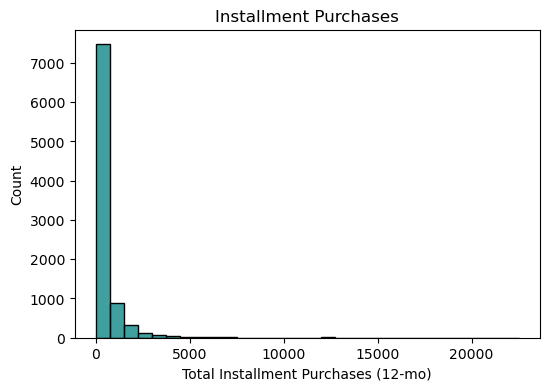

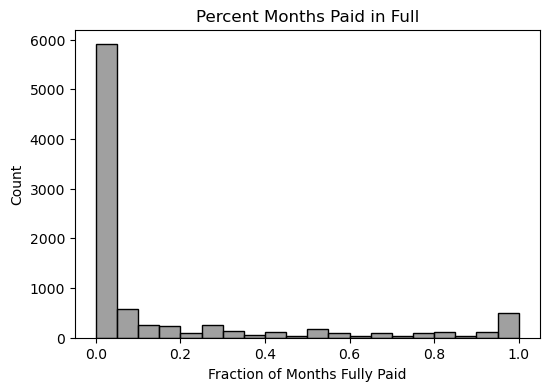

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df['ONEOFF_PURCHASES'], bins=30, color='violet')
plt.title('One-Off Purchases')
plt.xlabel('Total One-Off Purchases (12-mo)')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['INSTALLMENTS_PURCHASES'], bins=30, color='teal')
plt.title('Installment Purchases')
plt.xlabel('Total Installment Purchases (12-mo)')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['PRC_FULL_PAYMENT'], bins=20, color='gray')
plt.title('Percent Months Paid in Full')
plt.xlabel('Fraction of Months Fully Paid')
plt.show()


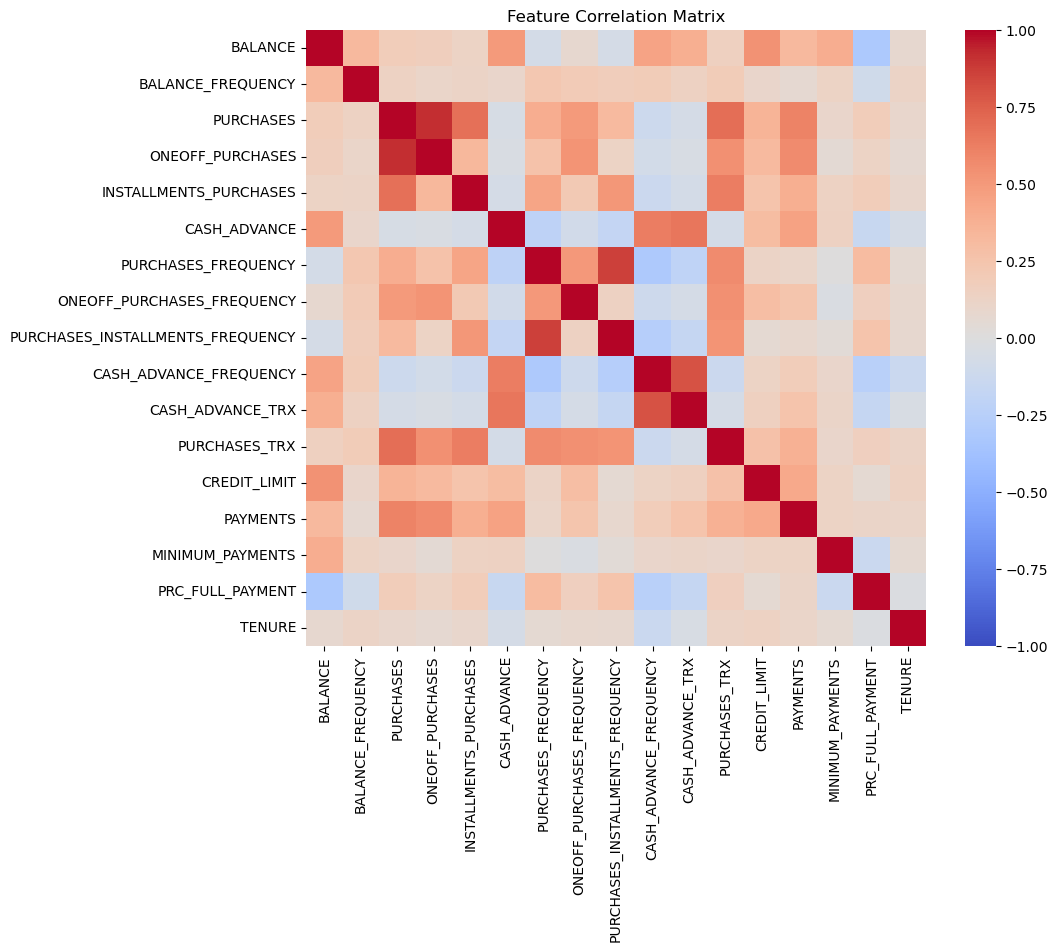

In [15]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()


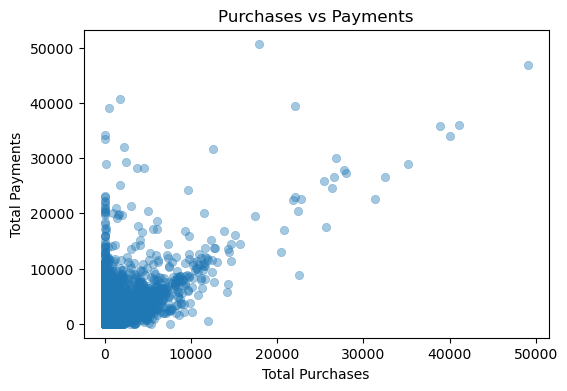

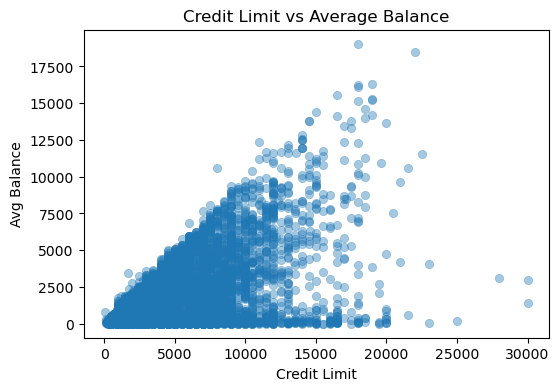

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='PURCHASES', y='PAYMENTS', data=df, alpha=0.4, edgecolor=None)
plt.title('Purchases vs Payments')
plt.xlabel('Total Purchases')
plt.ylabel('Total Payments')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=df, alpha=0.4, edgecolor=None)
plt.title('Credit Limit vs Average Balance')
plt.xlabel('Credit Limit')
plt.ylabel('Avg Balance')
plt.show()
